In [2]:
import json
import glob
import matplotlib.pylab as plt
import numpy as np
from scipy.special import erf
import sys
sys.path.append('./../figures/')
from makeCorner import *

Load `.json` results file which contains
1. direct output from `emcee` interference, without any processing
2. post-processed output from `emcee` inference

In [3]:
name = "component_spin_betaSpikePlusTruncatedMixture"
raw_chain_fnames = np.sort(glob.glob(f"../code/emceeCode/.tmp/{name}_r??.npy"))
raw_chains = np.concatenate([np.load(chain) for chain in raw_chain_fnames], axis=1)
print(raw_chains.shape)

data = np.load(f"../code/emceeCode/.tmp/{name}_r00_processed.npy", allow_pickle=True)

#with open(f'{name}.json', 'r') as f:
    #data = json.load(f)

(20, 75535, 8)


The contents of this file are the following:

| Parameter (dict key) | Description |
| :-------- | :---------- |
| `mu_chi` | Mean of the spin magnitude beta distribution|
| `sigma_chi` | Standard deviation of the spin magnitude beta distribution |
| `MF_cost` | Mixing fraction in aligned spin subpopulation forthe  $\cos\theta$ distribution |
| `sigma_cost` |  Standard deviation of the  aligned spin subpopulation for the $\cos\theta$ distribution |
| `frac_in_spike` |  Mixing fraction in half gaussian spike at $\chi = 0$ |
| `sigma_spike` | Standard deviation of the half gaussian spike at $\chi = 0$  |
| `cost_min` | Minimum cutoff for the $\cos\theta$ distribution |
| `Bq` | Power-law index on the conditional secondary mass distribution $p(m_2 | m_1)$|

Next, plot our various chains to inspect convergence:

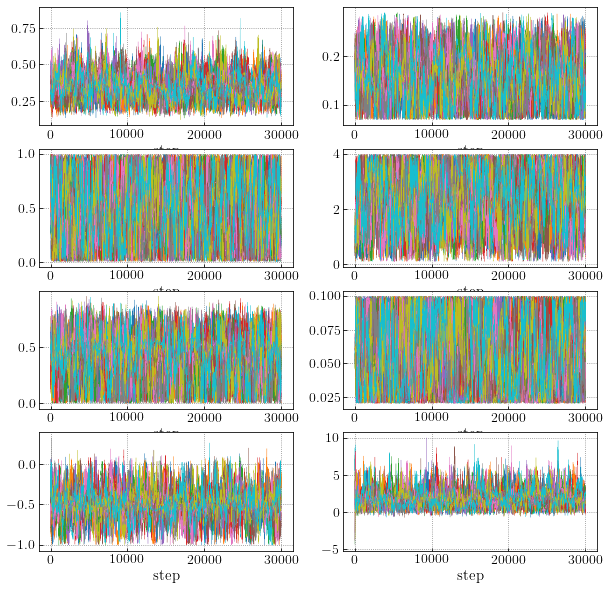

In [17]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,10))

for chain in raw_chains: 
    i=0
    for ax in axes: 
        for a in ax: 
            a.plot(chain[:,i], lw=0.25)
            i = i + 1
    
#axes[0][0].set_ylabel(r'$\mu_\chi$', fontsize=15)
#axes[0][1].set_ylabel(r'$\sigma_\chi$', fontsize=15)
#axes[1][0].set_ylabel(r'$\mu_{\cos t}$', fontsize=15)
#axes[1][1].set_ylabel(r'$\sigma_{\cos t}$', fontsize=15)

for ax in axes: 
    for a in ax:
        a.set_xlabel('step', fontsize=15)        
plt.show()

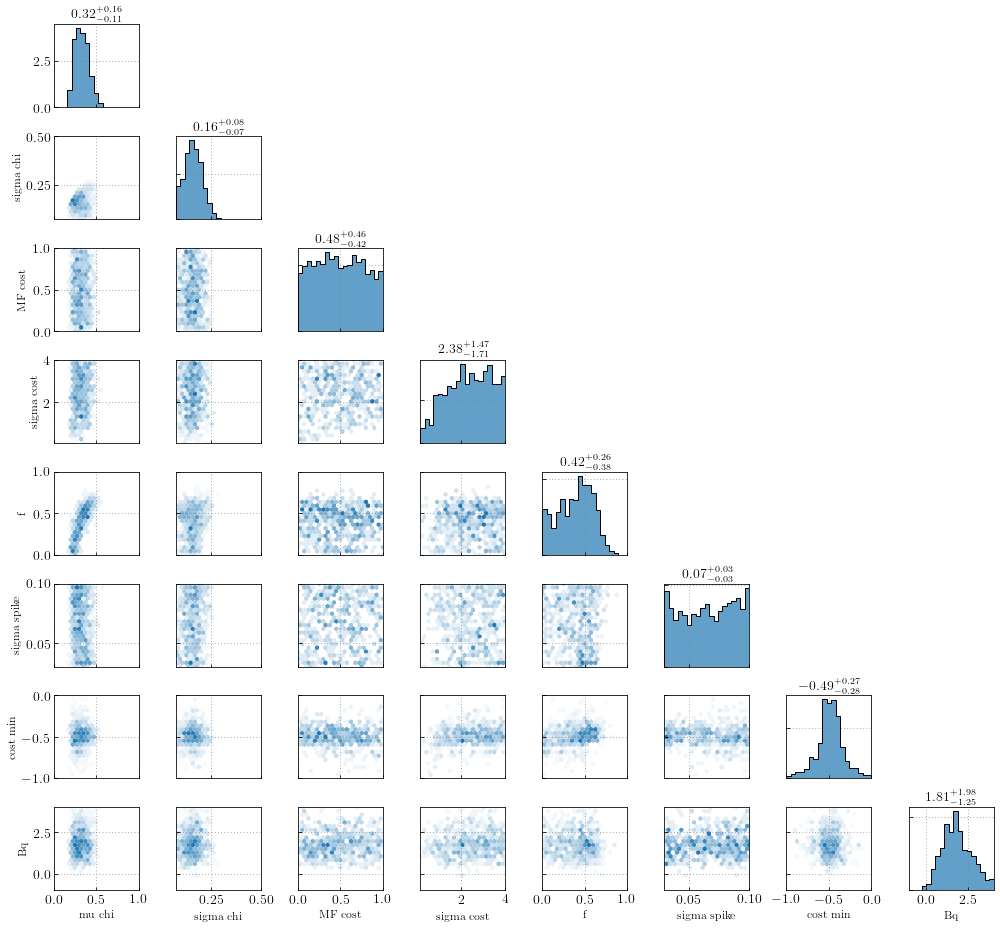

In [ ]:
fig = plt.figure(figsize=(14,13))

toPlot = {
    'mu_chi':{"data":data[:,0][np.where(data[:,5]>0.03)], "plot_bounds":(0,1), "label":"mu chi"},
    'sigma_chi':{"data":data[:,1][np.where(data[:,5]>0.03)], "plot_bounds":(0.07,0.5), "label":"sigma chi"},
    'MF_cost':{"data":data[:,2][np.where(data[:,5]>0.03)], "plot_bounds":(0,1), "label":"MF cost"},
    'sigma_cost':{"data":data[:,3][np.where(data[:,5]>0.03)], "plot_bounds":(0.1,4), "label":"sigma cost"},
    'frac_in_spike':{"data":data[:,4][np.where(data[:,5]>0.03)], "plot_bounds":(0,1), "label":"f"},
    'sigma_spike':{"data":data[:,5][np.where(data[:,5]>0.03)], "plot_bounds":(0.03,0.1), "label":"sigma spike"},
    'cost_min':{"data":data[:,6][np.where(data[:,5]>0.03)], "plot_bounds":(-1,0), "label":"cost min"},
    'Bq':{"data":data[:,7][np.where(data[:,5]>0.03)], "plot_bounds":(-1,4), "label":"Bq"},
}

plot_corner(fig,toPlot,'#1f78b4',labelsize=12)
plt.tight_layout()
plt.show()